# Smart Manufacturing

![Screenshot](images/throughput_time.JPG) 

Scenario: We have been given data from a spare parts manufacturing plant that uses Fabricating Machines, and skilled Operators to produce spare parts. These are small parts and they are produced in the 100's. The manufacturing plant wants to produce as many parts as possible quickly.

**Data:** We have given given 1 day's manufacturing data. There are 2 Machines (M1 and M2) and 5 human operators (O1...O5) and on this day 3 parts (P1, P2 and P3) were produced.

Both M1 and M2 have different rates of production, when they are running. However, they both require some set-up time, as well as `change over` time when switching between different parts. 

__Stoppages__ Throughout the day, these machines get stopped for various reasons. These NPT (non-productive times) are due to the following reasons:
1. Alarms (machine parts overheating, high vibrations)
2. Operator stops (humans stopping the machines, for taking a break, replacing raw etc.)
3. Change over (when switching from one Part to manufacturing another)



**Goal for this lesson**: Compare the throughputs of the different machines, compare part manufacturing difficulty and operator efficiencies, by looking at the data


![Screenshot](images/CumulativeFlow.png) 

### Preparatory Tasks

1. Read the input file
2. Format the data into a proper time series (with datetime) Timestamps and floats for the sensor values
3. Plot the number of parts produced with time as the x-axis (flat areas are stoppage times)

## Questions to be answered

- Q1: How does Machine M1 compare against M2 in terms of its production capacity?
- Q2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?
- Q3: How do the 5 operators compare, in terms of their individual production rates?
- Q4: What is the actual `realized` production rate, when taking into account all the stoppages?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline

### 1. Reading the input file

In [3]:
data = pd.read_csv("smart_manufacturing_operator_machine_data.csv",sep=",",parse_dates=True)

In [4]:
data.head()

,Time,StopType,Operator,Part,NumberOfPieces,Machine
0,0:07:29.798441,Run,Op_2,P1,12483,M2
1,0:09:55.991285,Run,Op_1,P1,18988,M1
2,0:10:46.491958,Run,Op_1,P1,1793,M1
3,0:17:12.460362,ChangeOver,Op_1,P3,0,M1
4,0:21:34.147366,OpStop,Op_2,P1,0,M2


In [5]:
data.describe()

,NumberOfPieces
count,364.000000
mean,17045.392857
std,26282.495764
min,0.000000
25%,0.000000
50%,8036.500000
75%,22517.250000
max,191717.000000


### 2. Data formating

In [6]:
data.dtypes

Time              object
StopType          object
Operator          object
Part              object
NumberOfPieces     int64
Machine           object
dtype: object

In [7]:
import datetime

In [8]:
data = data.iloc[0:-2,:]
data['Time'] = [datetime.datetime.strptime(data.Time[row],'%H:%M:%S.%f') for row in range(len(data.NumberOfPieces))]

#Rename Time to datetime
data = data.rename(columns={'Time': 'DateTime'})

#change date and time to correct formats and set Time as index 
data['Date'] = [d.date() for d in data['DateTime']]
data['Time'] = [d.time() for d in data['DateTime']]
data.set_index(data['Time'],inplace=True)

In [9]:
data.drop(columns=['Date'],inplace=True)
data.drop(columns=['Time'],inplace=True)

In [14]:
data.head(30)

,DateTime,StopType,Operator,Part,NumberOfPieces,Machine
Time,,,,,,
00:07:29.798441,1900-01-01 00:07:29.798441,Run,Op_2,P1,12483,M2
00:09:55.991285,1900-01-01 00:09:55.991285,Run,Op_1,P1,18988,M1
00:10:46.491958,1900-01-01 00:10:46.491958,Run,Op_1,P1,1793,M1
00:17:12.460362,1900-01-01 00:17:12.460362,ChangeOver,Op_1,P3,0,M1
00:21:34.147366,1900-01-01 00:21:34.147366,OpStop,Op_2,P1,0,M2
00:26:35.334250,1900-01-01 00:26:35.334250,Run,Op_2,P1,8341,M2
00:37:23.623745,1900-01-01 00:37:23.623745,OpStop,Op_2,P1,0,M2
00:40:47.510784,1900-01-01 00:40:47.510784,OpStop,Op_1,P3,0,M1
00:52:31.768323,1900-01-01 00:52:31.768323,OpStop,Op_2,P1,0,M2


In [15]:
data.dtypes

DateTime          datetime64[ns]
StopType                  object
Operator                  object
Part                      object
NumberOfPieces             int64
Machine                   object
dtype: object

### 3. Plotting parts produced

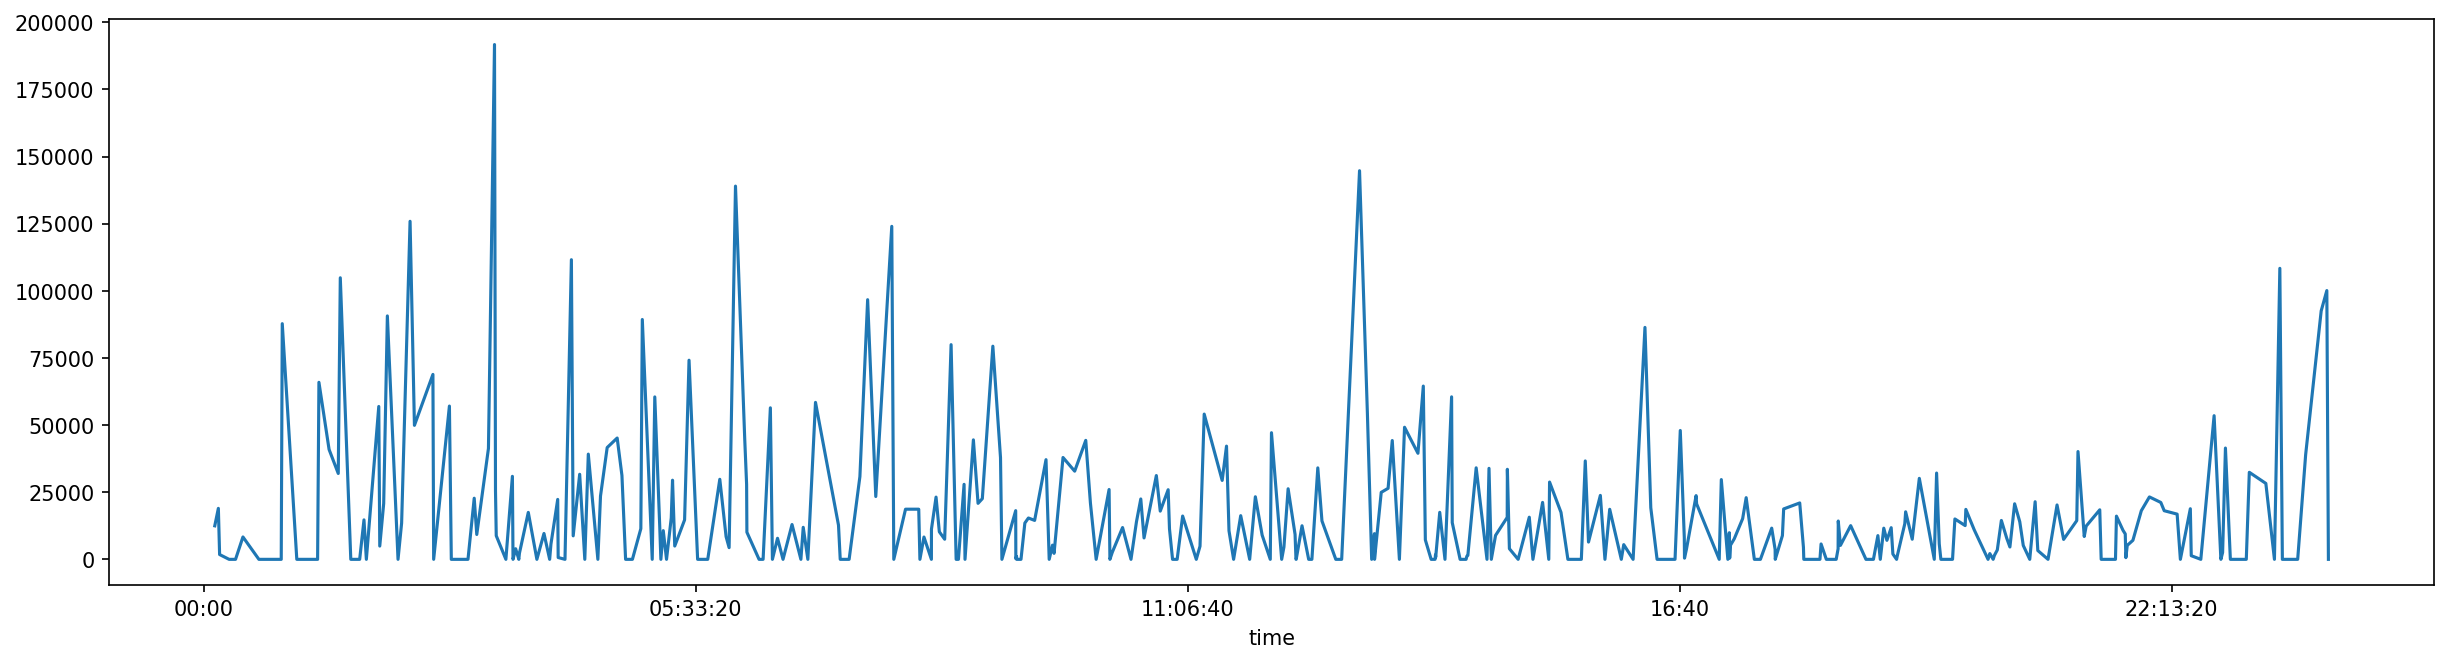

In [19]:
fig = plt.figure(figsize=(20, 5),dpi=150)
plt.plot(data.index, data['NumberOfPieces'])

### - Q1: How does Machine M1 compare against M2 in terms of its production capacity?

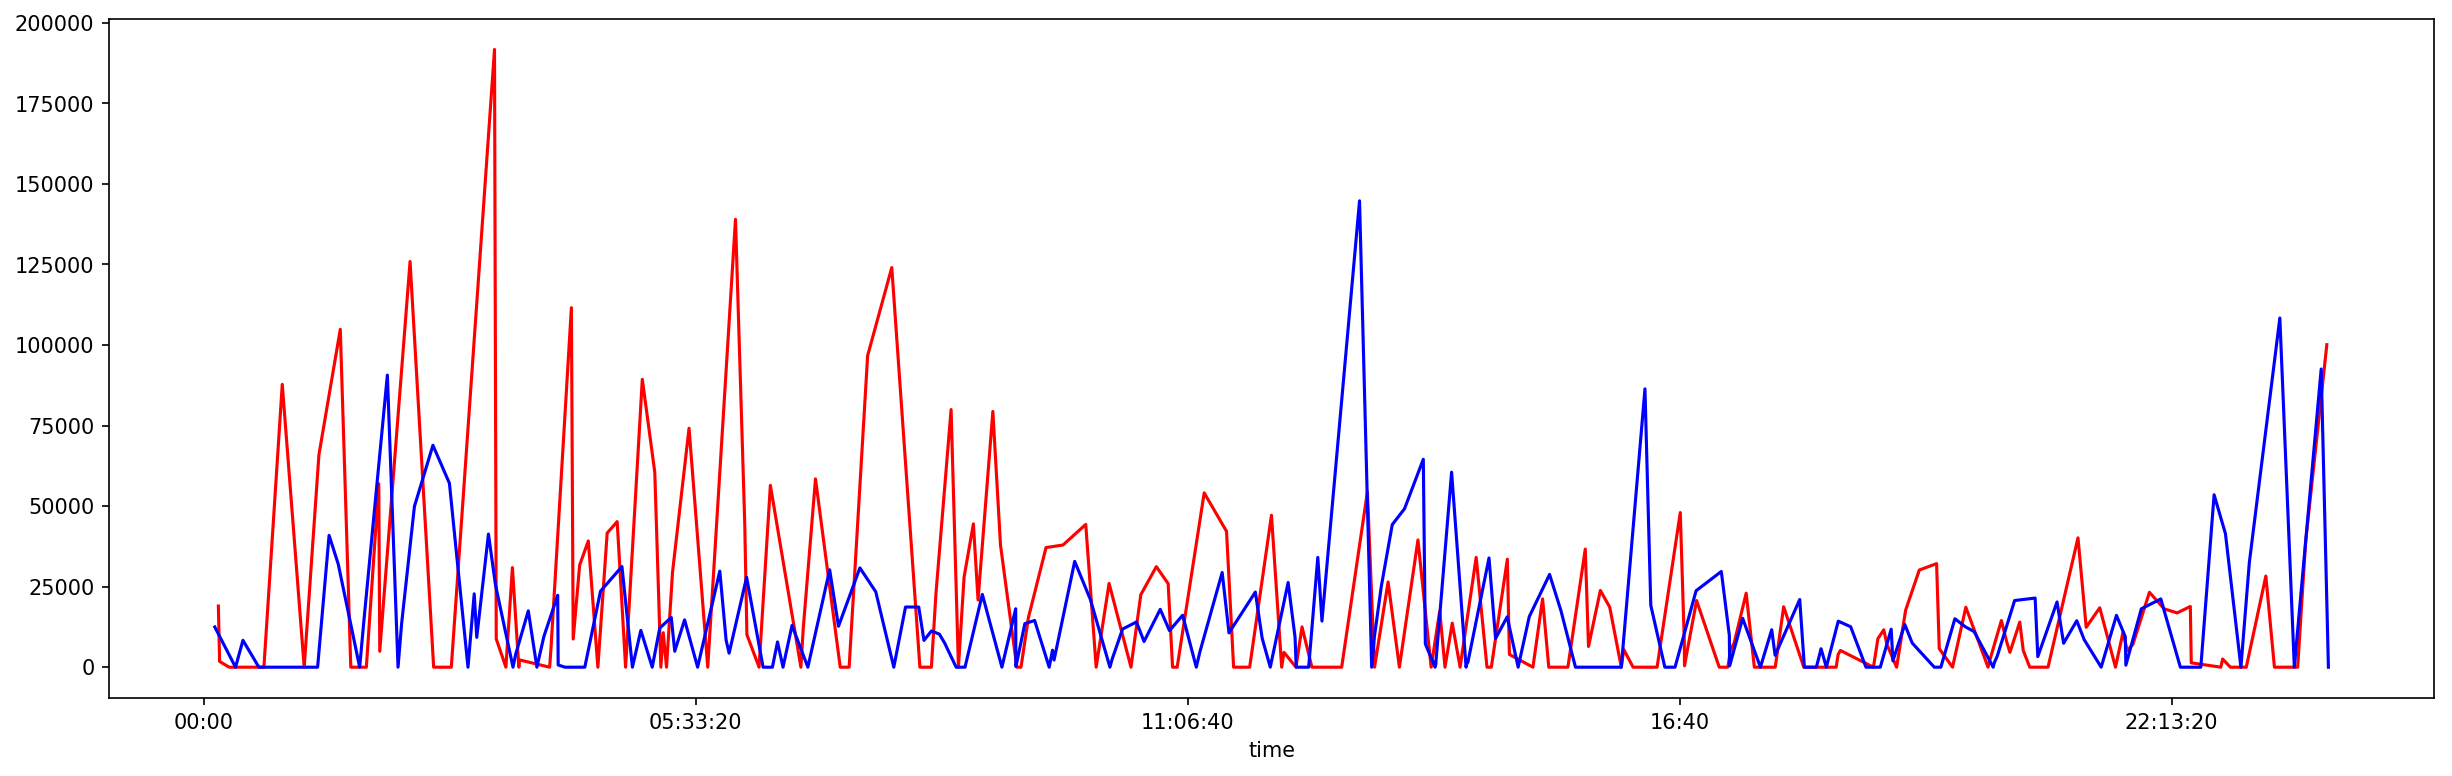

In [26]:
# select data related to each individual machine and store
M1_cap = data.loc[data['Machine']=="M1"]
M2_cap = data.loc[data['Machine']=="M2"]

fig = plt.figure(figsize=(20, 6),dpi=150)

# For each machine data plot the number of pieces with index
plt.plot(M1_cap.index, M1_cap['NumberOfPieces'], color ='red')
plt.plot(M2_cap.index, M2_cap['NumberOfPieces'], color = 'blue')
plt.show()

### - Q2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?

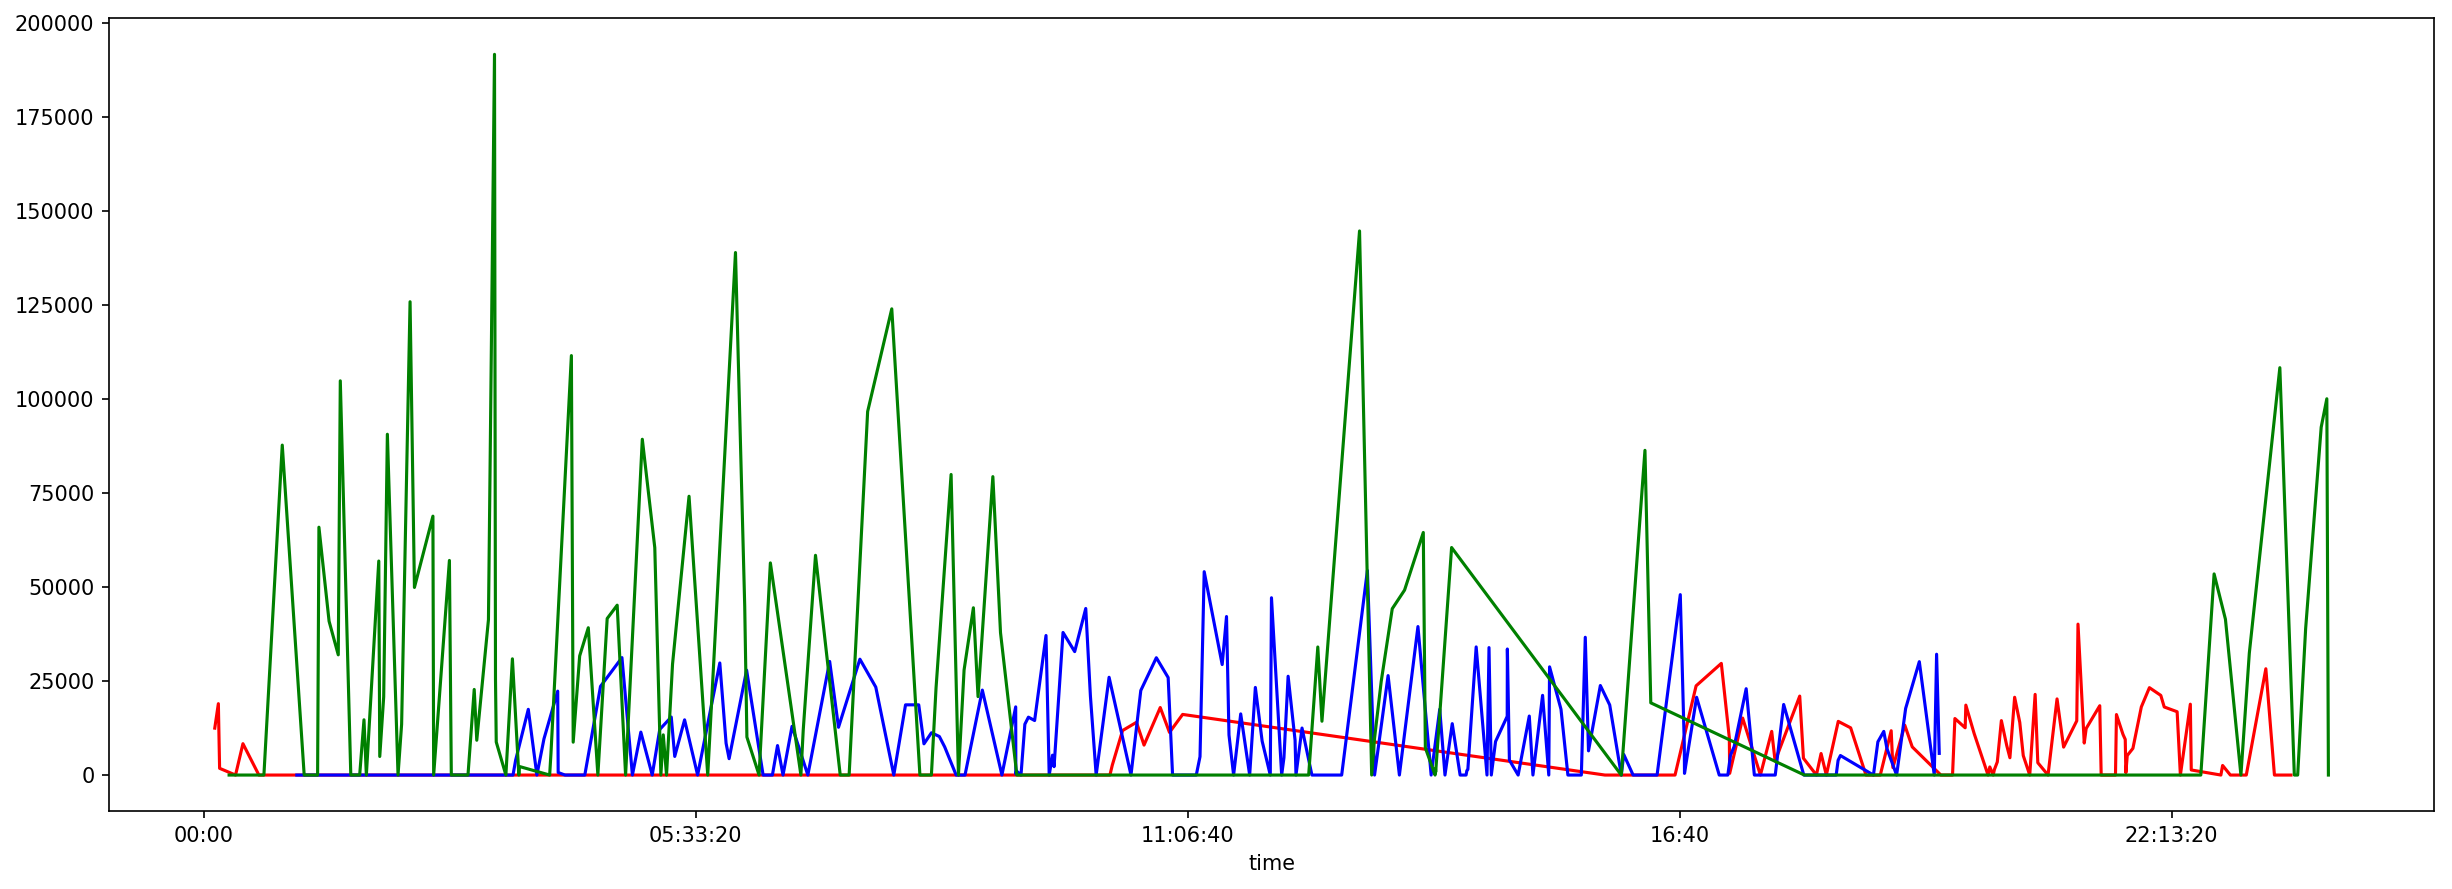

In [29]:
# select data related to each part and store
P1_cap = data.loc[data['Part']=="P1"]
P2_cap = data.loc[data['Part']=="P2"]
P3_cap = data.loc[data['Part']=="P3"]

fig = plt.figure(figsize=(20, 7), dpi=150)

plt.plot(P1_cap.index, P1_cap['NumberOfPieces'], color ='red')
plt.plot(P2_cap.index, P2_cap['NumberOfPieces'], color ='blue')
plt.plot(P3_cap.index, P3_cap['NumberOfPieces'], color ='green')

### - Q3: How do the 5 operators compare, in terms of their individual production rates?

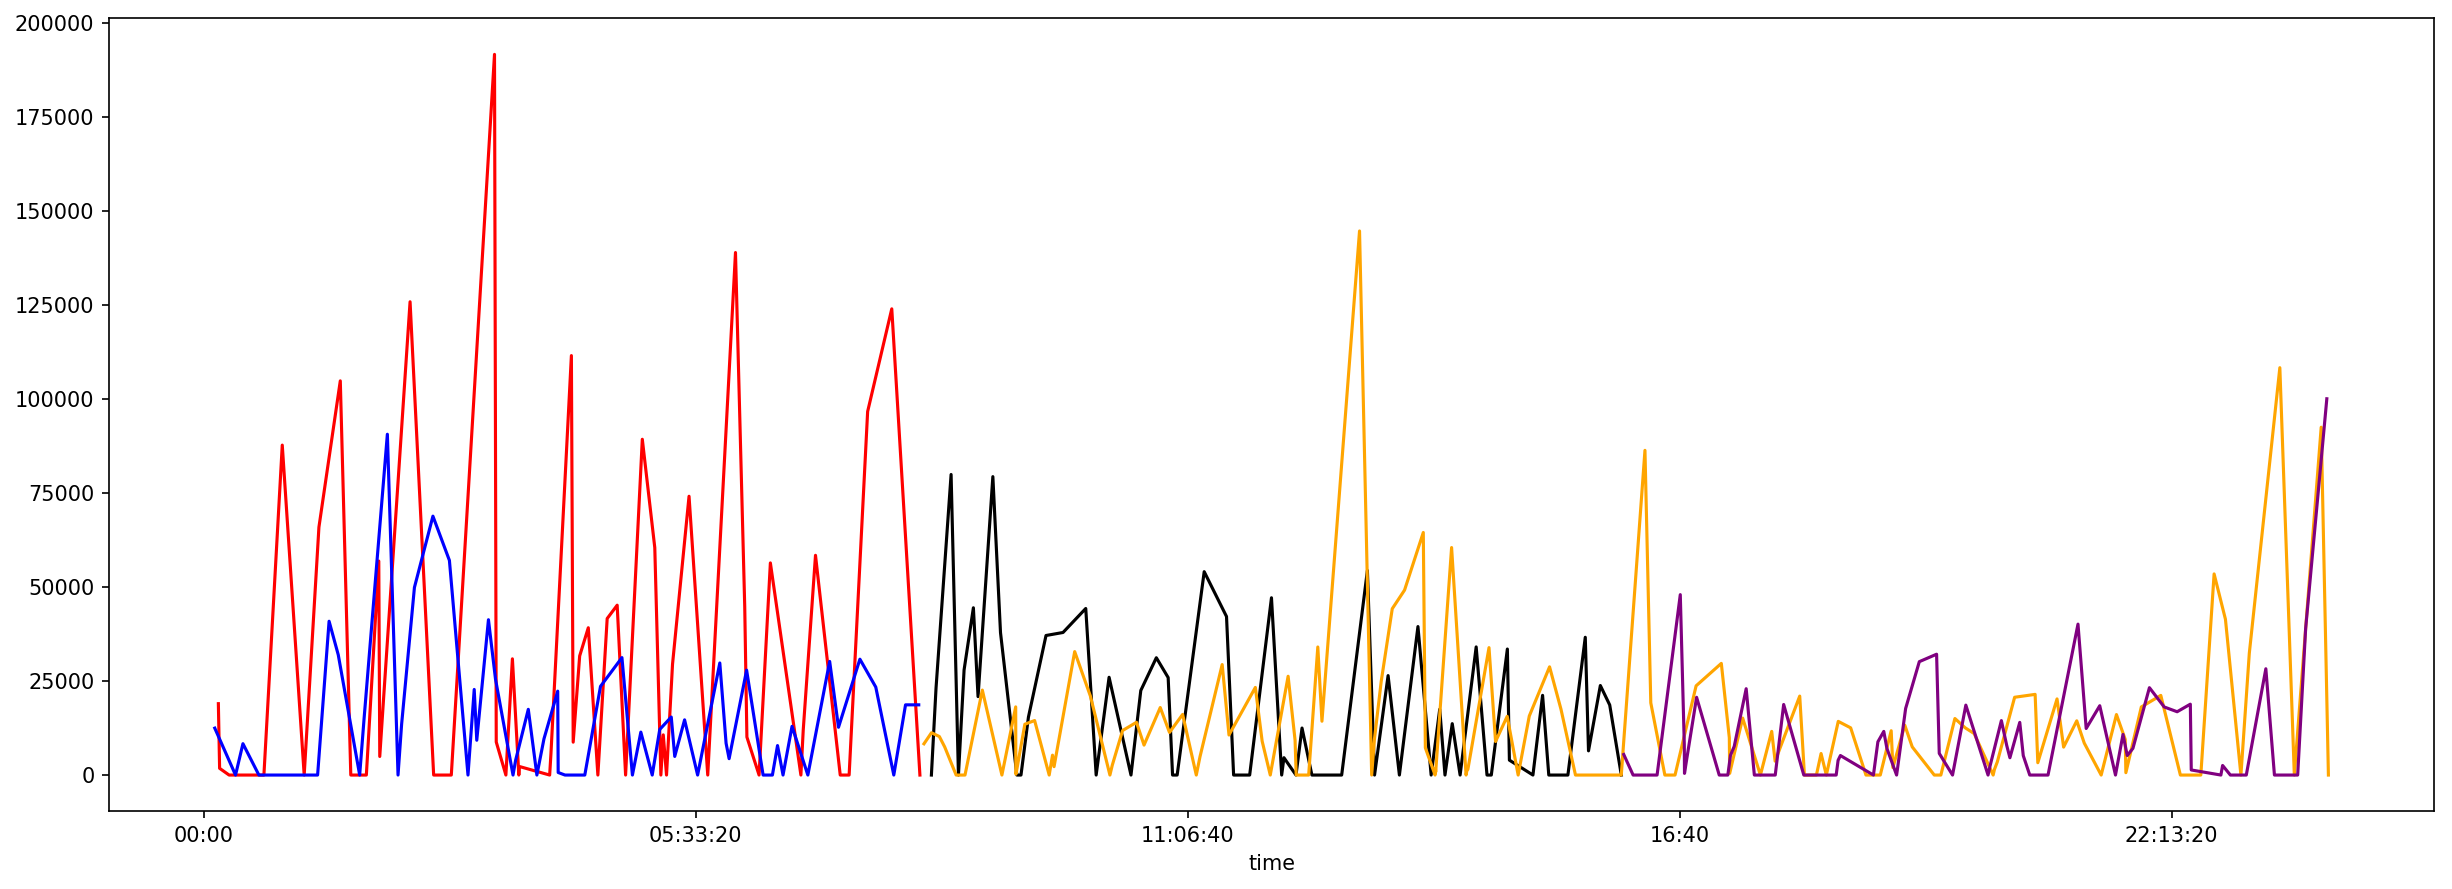

In [30]:
# select data related to each operator and store
O1_cap = data.loc[data['Operator']=="Op_1"]
O2_cap = data.loc[data['Operator']=="Op_2"]
O3_cap = data.loc[data['Operator']=="Op_3"]
O4_cap = data.loc[data['Operator']=="Op_4"]
O5_cap = data.loc[data['Operator']=="Op_5"]

fig = plt.figure(figsize=(20, 7), dpi=150)

plt.plot(O1_cap.index, O1_cap['NumberOfPieces'], color ='red')
plt.plot(O2_cap.index, O2_cap['NumberOfPieces'], color ='blue')
plt.plot(O3_cap.index, O3_cap['NumberOfPieces'], color ='black')
plt.plot(O4_cap.index, O4_cap['NumberOfPieces'], color ='orange')
plt.plot(O5_cap.index, O5_cap['NumberOfPieces'], color ='purple')

### - Q4: What is the actual `realized` production rate, when taking into account all the stoppages?

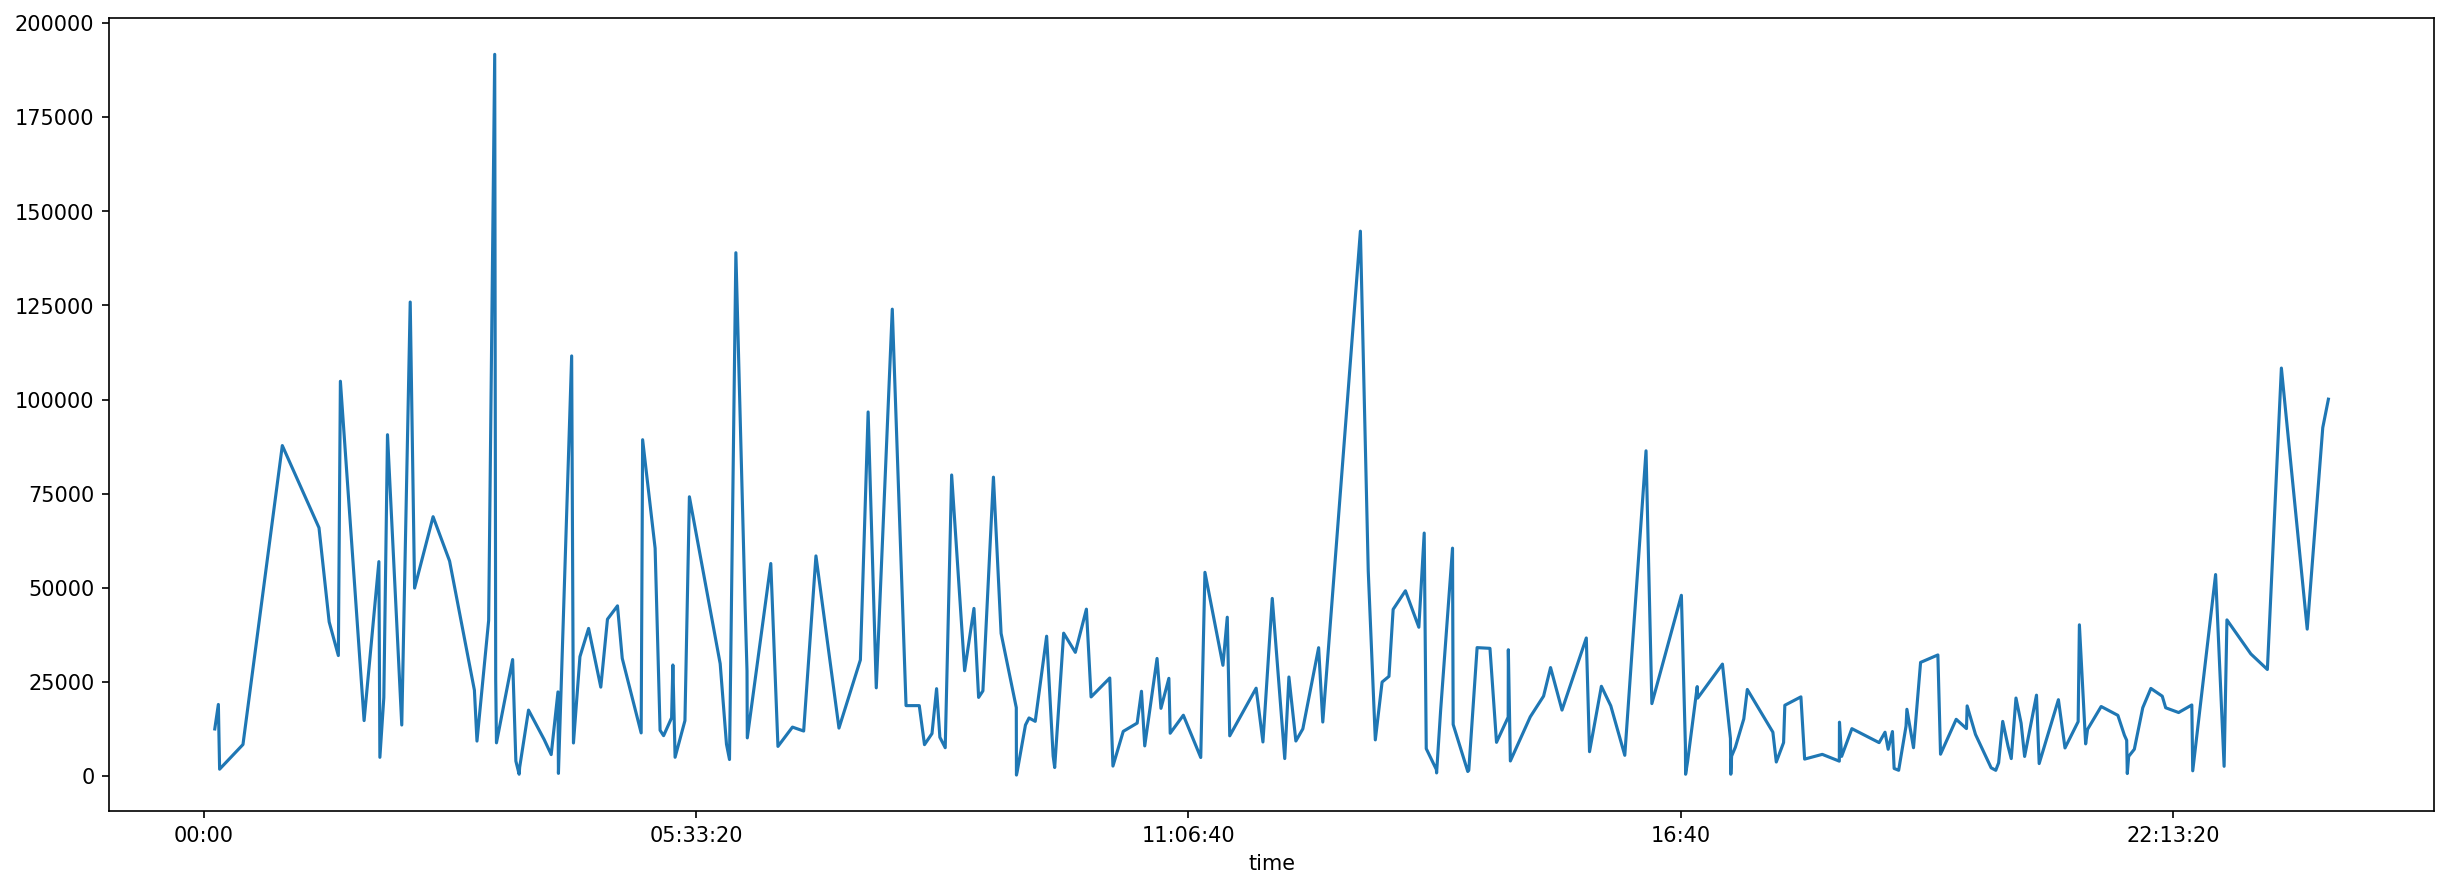

In [39]:
non_zero_data = data.loc[data['NumberOfPieces']!= 0]

fig = plt.figure(figsize=(20, 7), dpi=150)

plt.plot(non_zero_data.index, non_zero_data['NumberOfPieces'])

In [41]:
non_zero_data.head(10)

,DateTime,StopType,Operator,Part,NumberOfPieces,Machine
Time,,,,,,
00:07:29.798441,1900-01-01 00:07:29.798441,Run,Op_2,P1,12483,M2
00:09:55.991285,1900-01-01 00:09:55.991285,Run,Op_1,P1,18988,M1
00:10:46.491958,1900-01-01 00:10:46.491958,Run,Op_1,P1,1793,M1
00:26:35.334250,1900-01-01 00:26:35.334250,Run,Op_2,P1,8341,M2
00:53:13.742973,1900-01-01 00:53:13.742973,Run,Op_1,P3,87773,M1
01:18:04.080816,1900-01-01 01:18:04.080816,Run,Op_1,P3,65935,M1
01:24:57.199252,1900-01-01 01:24:57.199252,Run,Op_2,P3,40919,M2
01:31:10.176447,1900-01-01 01:31:10.176447,Run,Op_2,P3,31979,M2
01:32:32.937248,1900-01-01 01:32:32.937248,Run,Op_1,P3,104866,M1


In [42]:
# Calculate cumulative time through the data
non_zero_data['Duration'] = pd.to_timedelta(non_zero_data['DateTime'] - non_zero_data['DateTime'][0]).astype('timedelta64[s]')

C:\Users\0000690\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
non_zero_data.tail()

,DateTime,StopType,Operator,Part,NumberOfPieces,Machine,Duration
Time,,,,,,,
23:17:11.437581,1900-01-01 23:17:11.437581,Run,Op_5,P1,28276,M1,83381.0
23:26:40.553714,1900-01-01 23:26:40.553714,Run,Op_4,P3,108368,M2,83950.0
23:44:09.869926,1900-01-01 23:44:09.869926,Run,Op_5,P3,38999,M1,85000.0
23:54:41.517850,1900-01-01 23:54:41.517850,Run,Op_4,P3,92537,M2,85631.0
23:58:30.526797,1900-01-01 23:58:30.526797,Run,Op_5,P3,100101,M1,85860.0


In [46]:
# get total production seconds
total_pro_time_sec = non_zero_data.Duration.iat[-1]

85860.0

In [50]:
non_zero_data['Duration'] = pd.to_datetime(non_zero_data['Duration'], unit='s')

C:\Users\0000690\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
non_zero_data.Duration.iat[-1]

Timestamp('1970-01-01 23:51:00')

In [53]:
from datetime import timedelta

In [54]:
timedelta(non_zero_data.Duration.iat[-1])

TypeError: unsupported type for timedelta days component: Timestamp